In [1]:
!pip install squarify
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
plt.rcParams['figure.figsize'] = (30,10)
dtype={'godiste': int, 'kilometraza': int}
df = pd.read_csv("/car_data.csv", sep=';')
df.head()

,id,ime,lokacija,stanje,proizvodjac,model,godiste,kilometraza,vrata,gorivo,...,konjskih_snaga,emisioni_standard,registrovan,udaren,broj_pregleda,datum,datum_objave,radnja,cijena,link
0,371774,2013 Hyundai Santa Fe Sport,NaN,Korišteno,Hyundai,Santa Fe,2013,62160.0,4.0,Benzin,...,190.0,NaN,NaN,NaN,59935,2022-06-01,2022-06-01,0.0,28000,https://www.olx.ba/artikal/371774/2013-hyundai...
1,847536,Citroen dijana 6 - Oldtimer,Tešanj,Korišteno,Citroen,2 CV,1978,66000.0,4.0,Benzin,...,32.0,NaN,1.0,NaN,37203,2022-05-02,2022-05-02,0.0,12000,https://www.olx.ba/artikal/847536/citroen-dija...
2,1350016,Mercedes 190 2.0,Posušje,Korišteno,Mercedes-Benz,200,1990,141000.0,4.0,Benzin,...,NaN,NaN,NaN,NaN,34926,2022-04-17,2022-04-17,1.0,6500,https://www.olx.ba/artikal/1350016/mercedes-19...
3,1359725,Mercedes 124 300d,Posušje,Korišteno,Mercedes-Benz,E 300,1992,176826.0,4.0,Dizel,...,NaN,NaN,NaN,NaN,58663,2022-05-11,2022-05-11,1.0,13000,https://www.olx.ba/artikal/1359725/mercedes-12...
4,1531196,Golf 1 DIZEL,Posušje,Korišteno,Volkswagen,Golf,1983,165943.0,4.0,Dizel,...,NaN,NaN,NaN,NaN,21439,2022-05-11,2022-05-11,1.0,4500,https://www.olx.ba/artikal/1531196/golf-1-dizel/


In [3]:
# Total days listed
df['datum_objave'] = pd.to_datetime(df['datum_objave'])
df['datum'] = pd.to_datetime(df['datum'])
df['dana_objavljeno'] = df['datum'] - df['datum_objave'] + dt.timedelta(days=1)

In [4]:
# Removing outliers
df = df[df.kilometraza < 750000]
df = df[df.cijena < 500000]
df = df[df.godiste > 1959]
df = df[df.godiste < 2022]
df.shape

(99575, 23)

<a name="toc"></a>

# Table of contents
1. [Manufacturers](#cars_man)
2. [Models](#cars_mod)
3. [Condition](#condition)
4. [Age](#age)
5. [Mileage](#mileage)
6. [Fuel type](#fuel)

  6.1 [Is diesel loosing market share?](#diesel_petrol)

7. [Dealerships vs individuals](#dealerships_individuals)

  7.1 [Dealerships chaning mileage?](#dealerships_mileage)
    
  7.2 [Price difference](#price_difference)

	7.3 [Price difference at 10-30k](#price_difference_10_30)

8. [Manufacturers data](#man_data)

	8.1 [Drive a lot?](#drive_a_lot)

	8.2 [Want a cheap car?](#cheap_man)

	8.3 [Want a newer car?](#new_man)

	8.4 [What gets sold fast?](#sold_fast)

	8.5 [What gets sold fast?](#not_sold)

	8.6 [Most viewed](#most_viewed)
    
9. [Age for different manufacturers](#man_age)

10. [Car price depreciation](#car_depreciation)

11. [Avg price over time](#avg_price_over_time)

<a name="cars_man"></a>
# 1 Manufacturers
[Back to TOC](#toc)

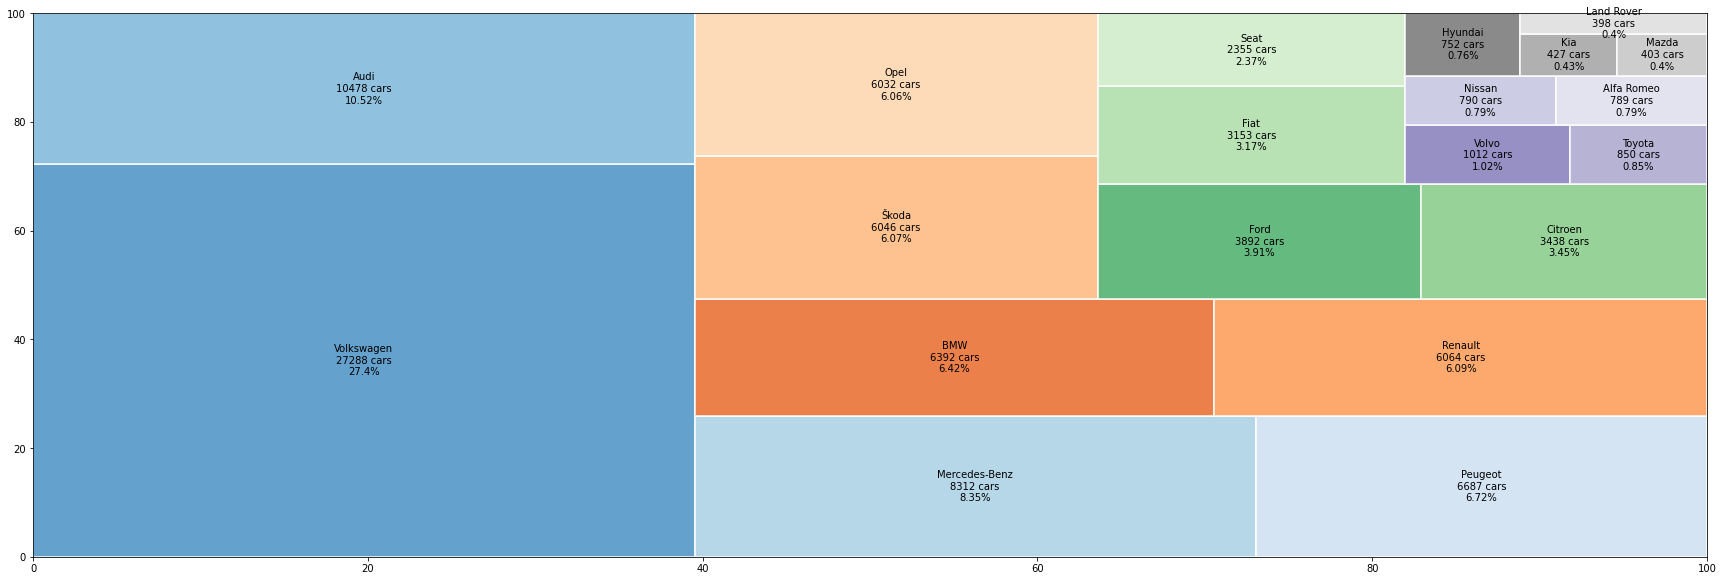

In [5]:
man_count = df.proizvodjac.value_counts()
man_percent = round((man_count/man_count.sum())*100,2)
man_prc = pd.DataFrame({"Cars": man_count, 'Percentage': man_percent})
man_top_20 = man_prc.head(20)
labels = [f"{man}\n{number} cars\n{percentage}%" 
          for man, number, percentage in 
          list(zip(man_top_20.index, man_top_20.Cars, man_top_20.Percentage))]
squarify.plot(sizes=man_top_20.Percentage, 
              label=labels, 
              color=plt.cm.tab20c.colors, 
              edgecolor="white", 
              linewidth=2,
              alpha=0.75)

Compared to Germany https://www.best-selling-cars.com/germany/2021-full-year-germany-best-selling-car-brands/#:~:text=In%202021%2C%20Volkswagen%2C%20Mercedes%2D,share%20while%20Ford%20sales%20plummeted.&text=In%20full%2Dyear%202021%2C%20Volkswagen,Germany%20and%20increased%20market%20share.

<a name="cars_mod"></a>
# 2 Models
[Back to TOC](#toc)

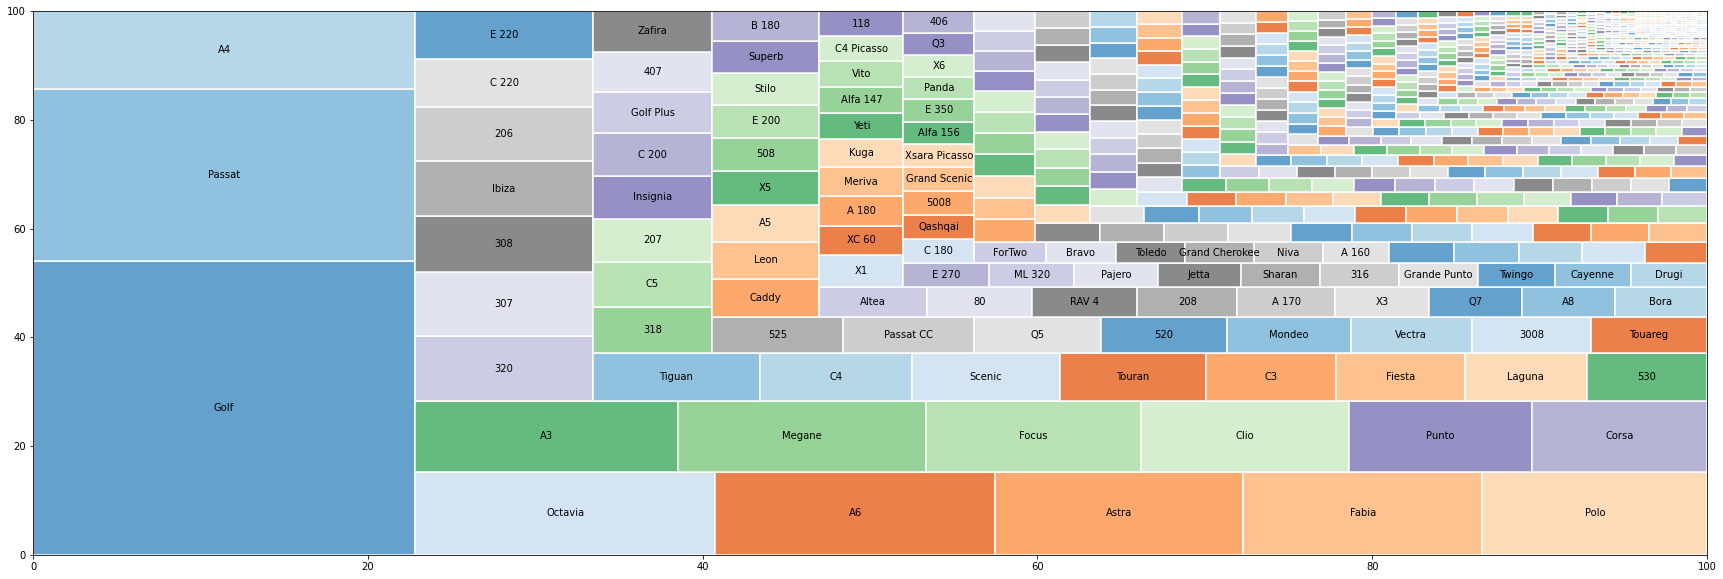

In [6]:
model_count = df.model.value_counts()
model_percentage = round((model_count/model_count.sum())*100,2)
mod_prc = pd.DataFrame({"Cars": model_count, 'Percentage': model_percentage})
labels = [f"{cars}" for cars in list(mod_prc.index)[:100]]
# ax = fig.add_suplot(111)
squarify.plot(sizes=mod_prc.Cars, 
              label=labels, 
              color=plt.cm.tab20c.colors, 
              edgecolor="white", 
              linewidth=2,
              alpha=0.75)

In [7]:
mod_prc.head(20)

,Cars,Percentage
Golf,12286,12.34
Passat,7200,7.23
A4,3231,3.24
Octavia,2737,2.75
A6,2545,2.56
Astra,2263,2.27
Fabia,2177,2.19
Polo,2046,2.05
A3,2024,2.03
Megane,1904,1.91


<a name="condition"></a>
# 3 Condition
[Back to TOC](#toc)

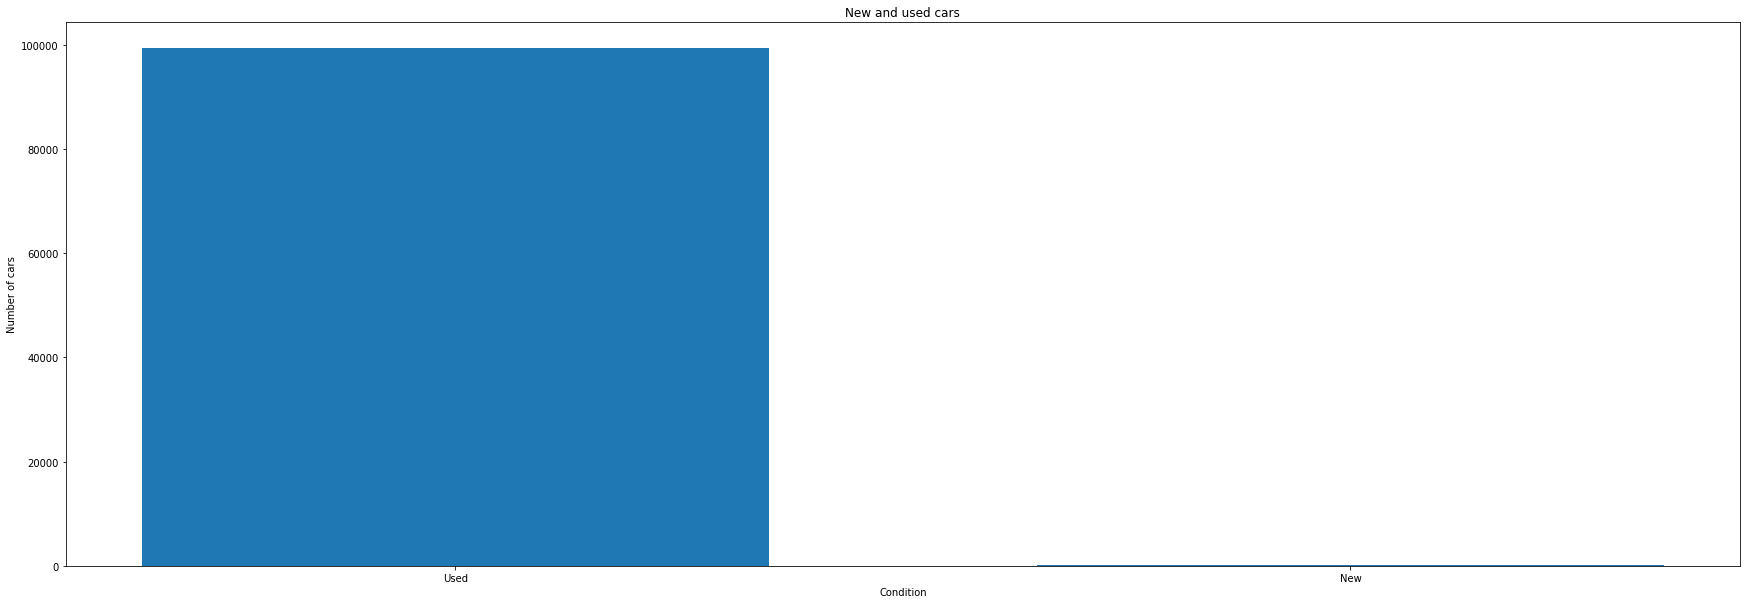

Used cars    99334, 99.76%
New cars       241,  0.24%


In [8]:
used, new = df.stanje.value_counts()
total = used + new
plt.bar(("Used", "New"), (used, new), width=0.7)
plt.xlabel("Condition")
plt.ylabel("Number of cars")
plt.title("New and used cars")
plt.show()
print(f"{'Used cars':<10} {used:>7}, {round(used/total*100,2):>5}%")
print(f"{'New cars':<10} {new:>7}, {round(new/total*100,2):>5}%")

<a name="age"></a>
# 4 Age
[Back to TOC](#toc)

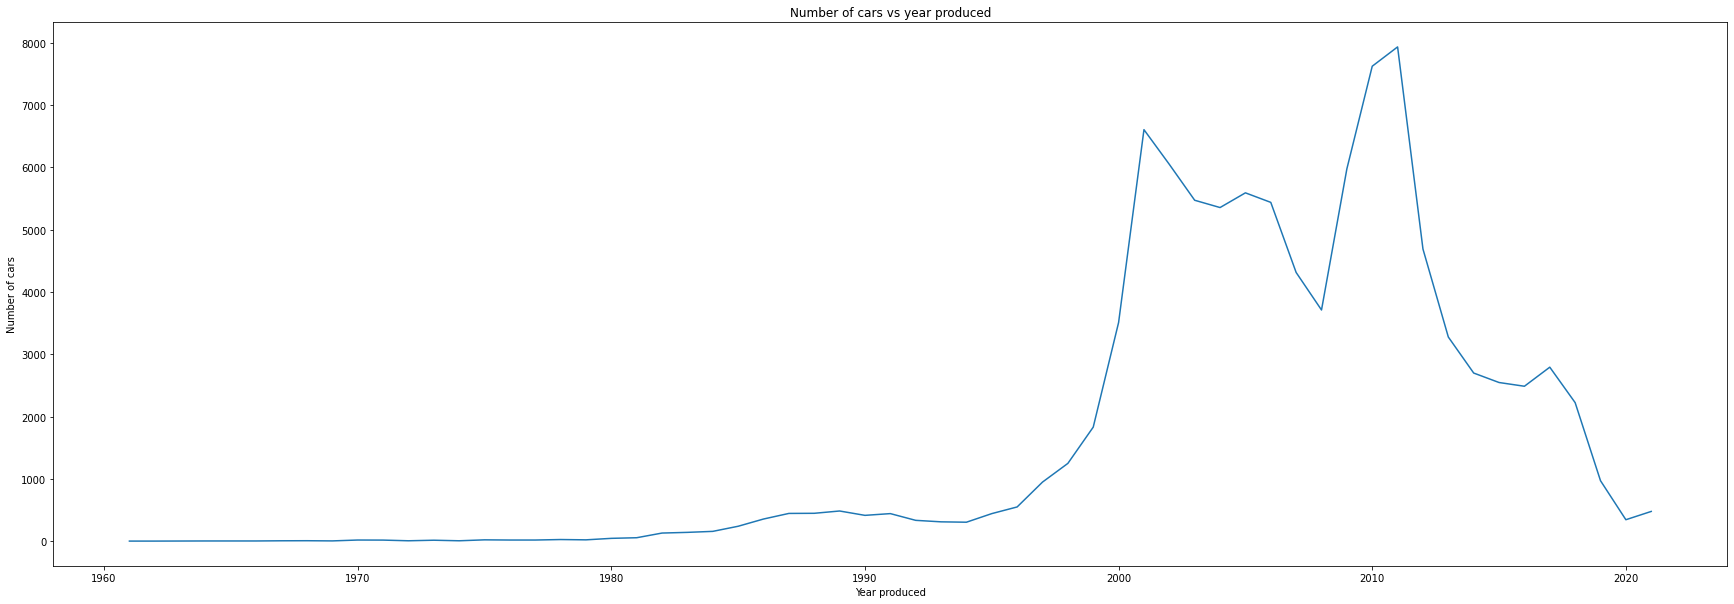

In [9]:
df.groupby('godiste')['ime'].count().plot(
    ylabel="Number of cars",
    xlabel="Year produced",
    title="Number of cars vs year produced",
    figsize=[30,10]
)

<a name="mileage"></a>
# 5 Mileage
[Back to TOC](#toc)

In [10]:
df = df[df.kilometraza < 750000]

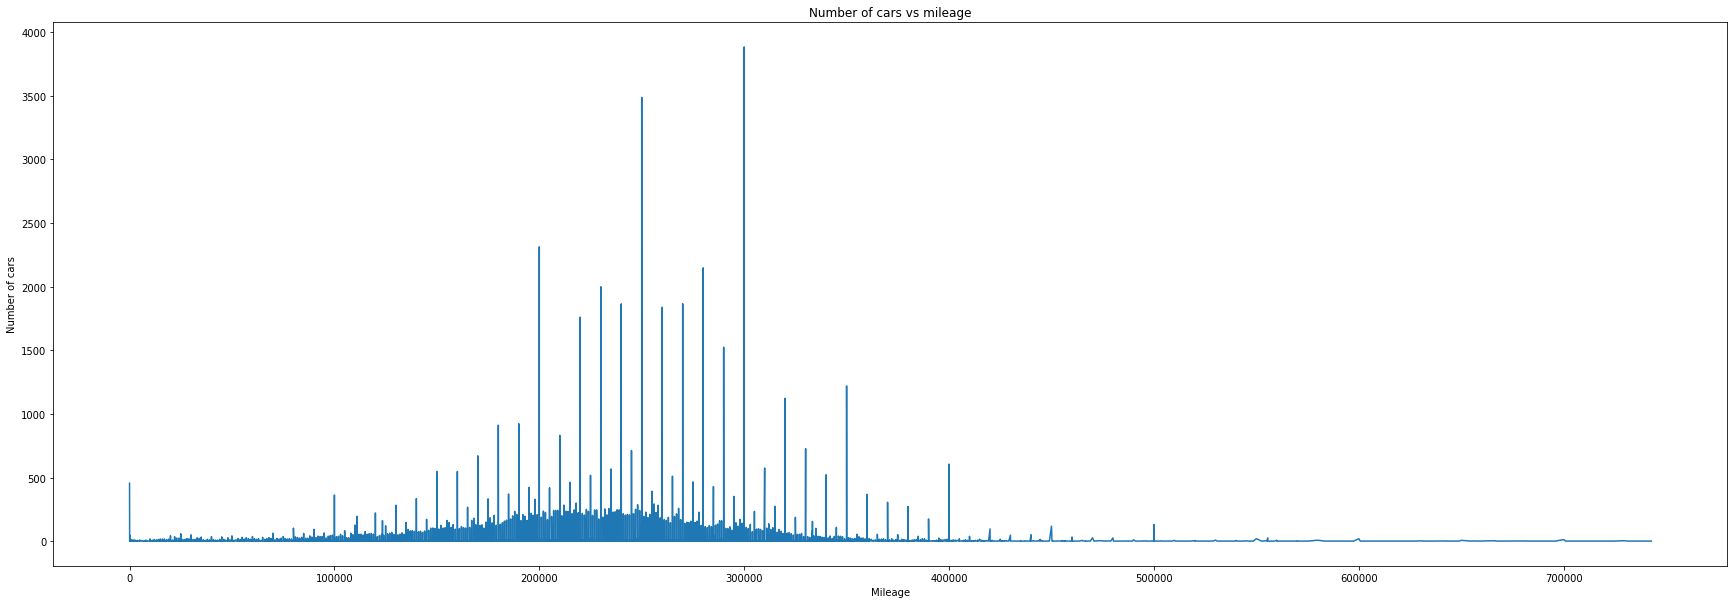

In [11]:
df.groupby('kilometraza')['ime'].count().plot( 
    ylabel = "Number of cars",
    xlabel = "Mileage",
    title="Number of cars vs mileage",
)

**People seem to be rounding mileage (which is expected), especially around big numbers like 200 000, 250 000, 300 000.**
**And since there seems to be the dip in number of cars after each of these, most people are rounding down.**

In [12]:
# The average km driven for all cars
df.kilometraza.mean()

233032.09820738138

<a name="fuel"></a>
# 6 Fuel type
[Back to TOC](#toc)

In [13]:
fuel_cars = df.groupby('gorivo')['ime'].count()
fuel_km = df.groupby('gorivo')['kilometraza'].mean().astype(int)
fuel_age = round(df.groupby('gorivo')['godiste'].mean(),2)
fuel_km_per_year = (df.groupby('gorivo')['kilometraza'].mean()/(2022-df.groupby('gorivo')['godiste'].mean())).astype(int)
fuel_price = df.groupby('gorivo')['cijena'].mean().astype(int)
fuel_val = pd.DataFrame({'cars':fuel_cars,
                         'avg km': fuel_km, 
                         'avg year': fuel_age, 
                         'avg km per year':fuel_km_per_year, 
                         'avg price':fuel_price})
fuel_val

,cars,avg km,avg year,avg km per year,avg price
gorivo,,,,,
Benzin,17733,199842,2003.33,10703,9266
Dizel,77675,239903,2007.67,16745,15797
Elektro,39,66710,2016.90,13073,67504
Hibrid,96,117680,2015.71,18704,53504
Plin,4025,251028,2002.15,12648,6103


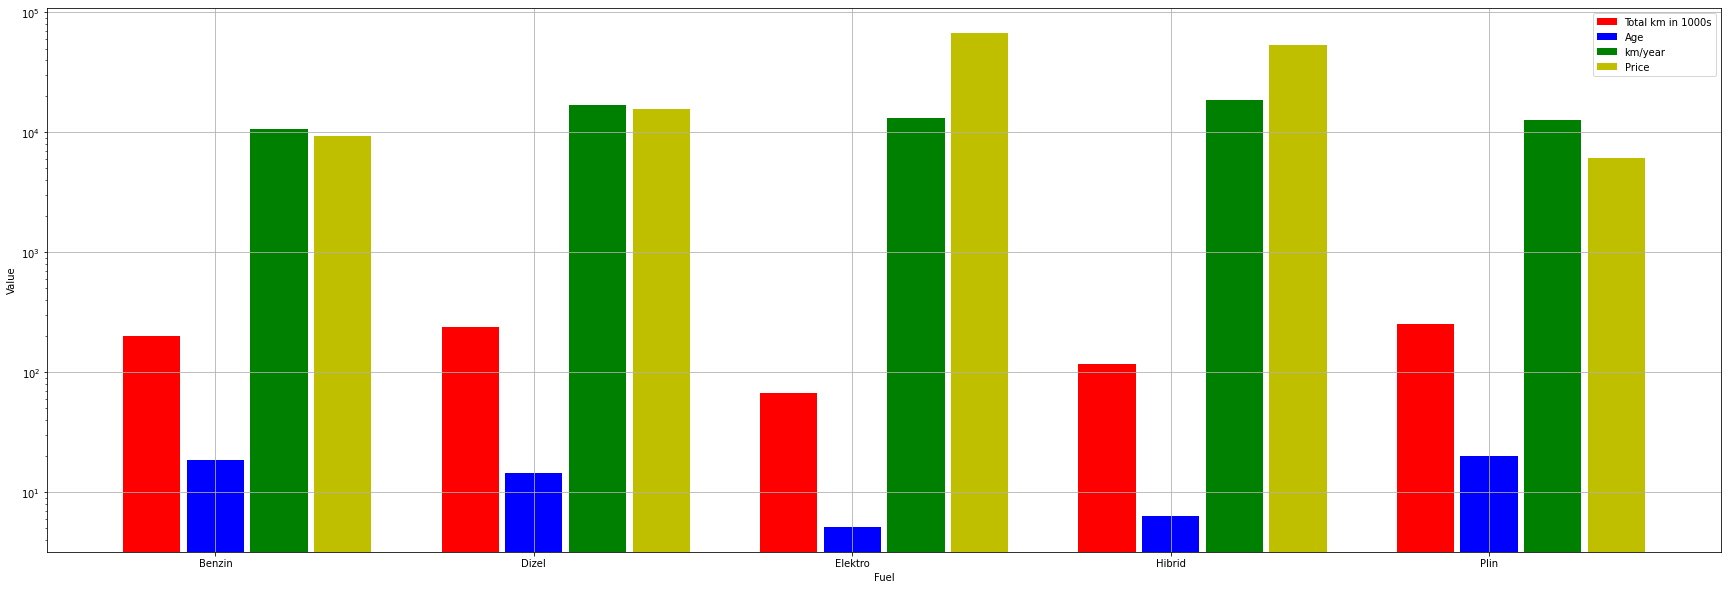

In [14]:
br1 = range(5)
br2 = [x + 0.20 for x in br1]
br3 = [x + 0.20 for x in br2]
br4 = [x + 0.20 for x in br3]
plt.bar(br1, list(x/1000 for x in fuel_val['avg km']), color='r', label='Total km in 1000s', width=0.18)
plt.bar(br2, list(2022 - x for x in fuel_val['avg year']), color='b', label="Age", width=0.18)
plt.bar(br3, list(fuel_val['avg km per year']), color='g', label='km/year', width=0.18)
plt.bar(br4, list(fuel_val['avg price']), color='y', label='Price', width=0.18)
plt.xlabel('Fuel')
plt.ylabel('Value')
plt.xticks([r+0.2 for r in range(5)], fuel_val.index)
plt.grid()
plt.legend()
plt.yscale('log')
plt.show()

In [15]:
# Sigh I could have done basically the same thing in one line
# fuel_val.plot(kind='bar', logy=True)

<a name="diesel_petrol"></a>
## 6.1 Is diesel loosing market share?
[Back to TOC](#toc)

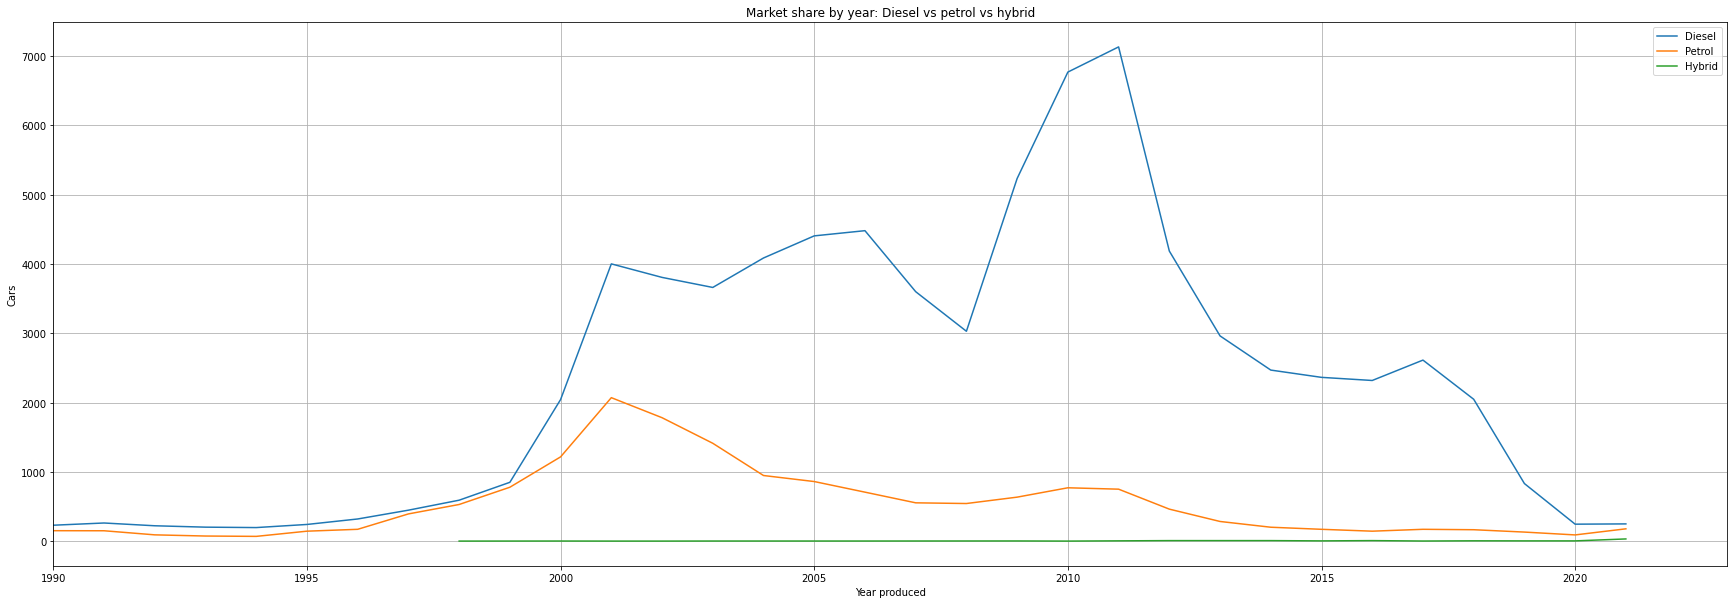

<Figure size 1440x720 with 0 Axes>

In [34]:
diesel = df.loc[df['gorivo'] == 'Dizel', 'godiste'].value_counts().sort_index()
petrol = df.loc[df['gorivo'] == 'Benzin', 'godiste'].value_counts().sort_index()
hybrid = df.loc[df['gorivo'] == 'Hibrid', 'godiste'].value_counts().sort_index()
plt.plot(diesel, label='Diesel')
plt.plot(petrol, label='Petrol')
plt.plot(hybrid, label='Hybrid')
plt.legend()
plt.title('Market share by year: Diesel vs petrol vs hybrid')
plt.xlabel('Year produced')
plt.ylabel('Cars')
plt.grid()
plt.xlim([1990, 2023])
plt.figure(figsize=(20,10))
plt.show()

<a name="dealerships_individuals"></a>
# 7 Dealerships vs individuals
[Back to TOC](#toc)

Trying to see some differences based on who is selling the car.

<a name="dealerships_mileage"></a>
## 7.1 Dealership changing mileage
[Back to TOC](#toc)

Average km driven for cars grouped by the year they were made and by seller type. Trying to see if dealerships are messing with odometer. If dealerships were chaning mileage and individuals weren't we would expect to see lower mileage on cars sold by dealerships.

In [35]:
main_data = df[['proizvodjac', 'model', 'godiste', 'kilometraza', 'radnja', 'cijena']]

In [36]:
dealerships_data = main_data.loc[main_data.radnja == 1]
individuals_data = main_data.loc[main_data.radnja == 0]
print(dealerships_data.shape)
print(individuals_data.shape)

(18252, 6)
(80650, 6)


98902


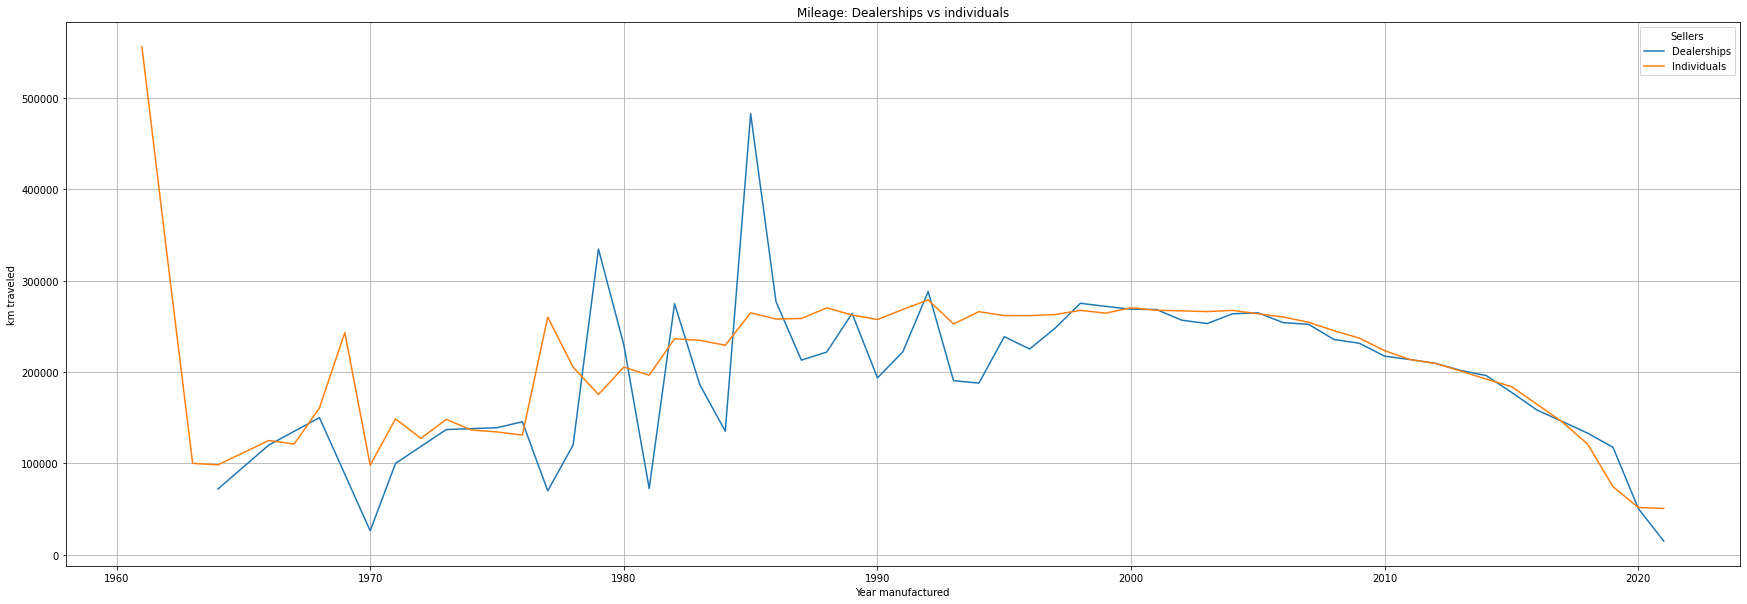

<Figure size 1440x720 with 0 Axes>

In [37]:
total_mileage = df.groupby('godiste')['kilometraza'].mean()
dealerships_mileage = dealerships_data.groupby('godiste')['kilometraza'].mean()
individuals_mileage = individuals_data.groupby('godiste')['kilometraza'].mean()
# plt.plot(total_mileage, label='Everyone')
plt.plot(dealerships_mileage, label='Dealerships')
plt.plot(individuals_mileage, label='Individuals')
plt.xlabel('Year manufactured')
plt.ylabel('km traveled')
plt.legend(title='Sellers')
plt.title('Mileage: Dealerships vs individuals')
plt.grid()
plt.figure(figsize=(20,10))
print(len(dealerships_data)+len(individuals_data))
plt.show()

**There seems be no noticeable difference.**

**For cars made before 2000 we don't have enough data so we can just look at newer cars.**

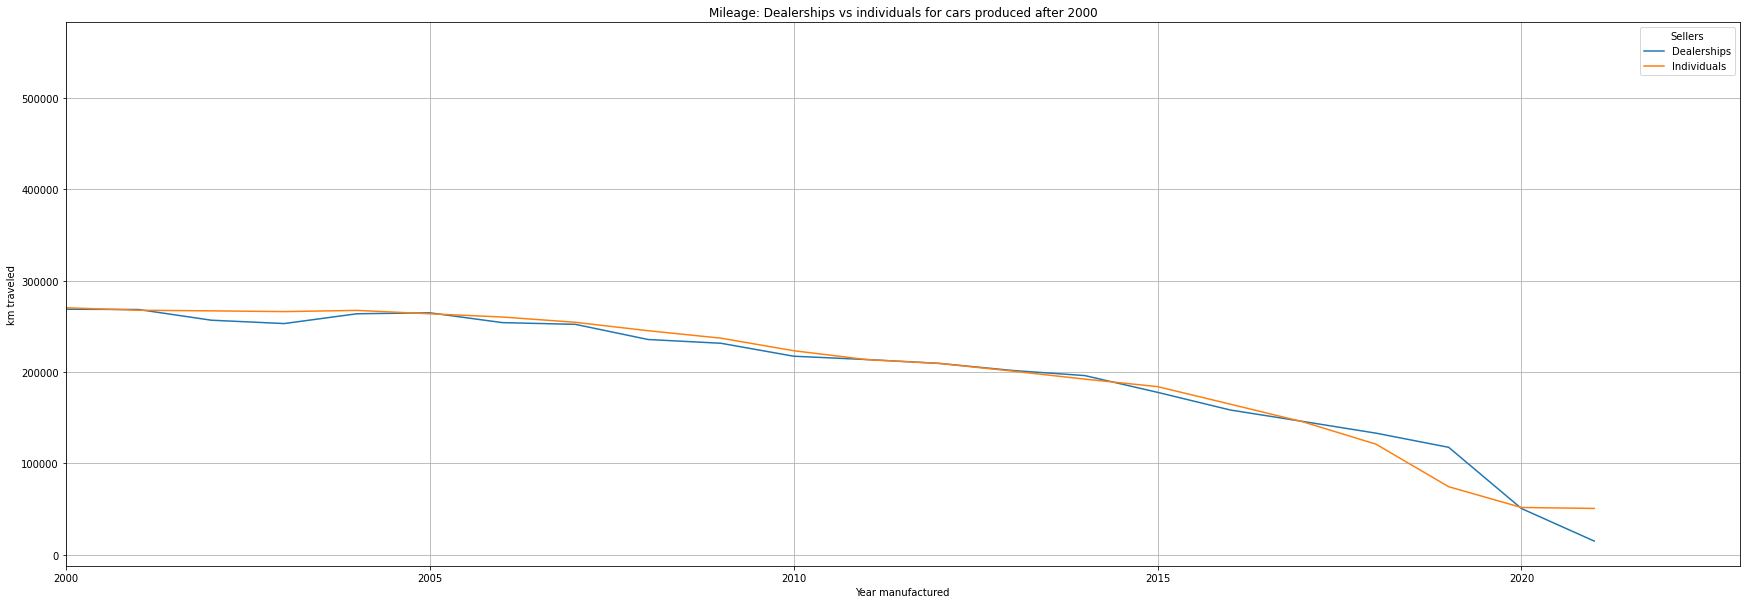

In [65]:
plt.plot(dealerships_mileage, label='Dealerships')
plt.plot(individuals_mileage, label='Individuals')
plt.xlabel('Year manufactured')
plt.ylabel('km traveled')
plt.legend(title='Sellers')
plt.title('Mileage: Dealerships vs individuals for cars produced after 2000')
plt.xlim([2000, 2023])
plt.grid()
plt.show()

**There seems to be no difference, at least with data available.** 

**I have personally checked many cars using carVertical and found many imported cars where odometer has been reduced by 100 000+ km.**

**It could be that either everyone is doing it, it's only done occasionally, it's done all the time by dealerships and individuals bought cars that were already tampered with, or something else that I didn't think of.**

<a name="price_difference"></a>
## 7.2 Price difference
[Back to TOC](#toc)

Avg price of cars grouped by age and by seller type.

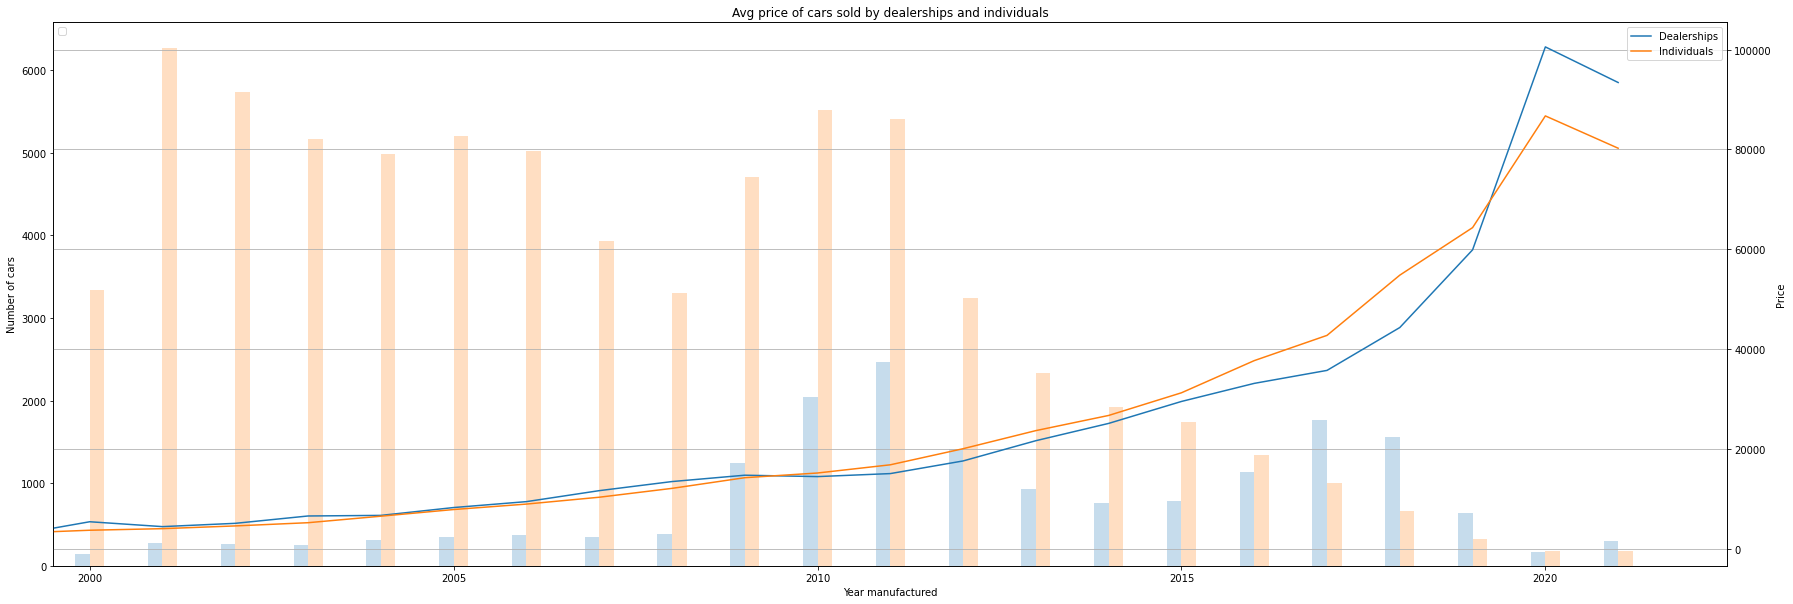

In [43]:
dealerships_price = dealerships_data.groupby('godiste')['cijena'].mean()
individuals_price = individuals_data.groupby('godiste')['cijena'].mean()
dealerships_cars = dealerships_data.groupby('godiste')['cijena'].count()
individuals_cars = individuals_data.groupby('godiste')['cijena'].count()

price_diff = pd.DataFrame({
    'dealerships_price': dealerships_price,
    'individuals_price': individuals_price,
    'dealerships_cars': dealerships_cars,
    'individuals_cars': individuals_cars,
})
price_diff.dropna(inplace=True)

fig, ax = plt.subplots()

width = 0.2
x_dealerships = [x - width/2 for x in list(price_diff.index)]
x_individuals = [x + width/2 for x in list(price_diff.index)]
ax.bar(x_dealerships, price_diff['dealerships_cars'], width=width, alpha=0.25)
ax.bar(x_individuals, price_diff['individuals_cars'], width=width, alpha=0.25)
ax.set_ylabel('Number of cars')
ax.set_xlabel('Year manufactured')
ax.legend(loc='upper left')

ax1 = ax.twinx()
ax1.plot(price_diff['dealerships_price'], label='Dealerships')
ax1.plot(price_diff['individuals_price'], label='Individuals')
ax1.set_ylabel('Price')
ax1.legend()

ax.set_title('Avg price of cars sold by dealerships and individuals')
plt.xlim(1999.5 ,2022.5)
plt.grid()
plt.show()

<a name="price_difference_10_30"></a>
## 7.3 Price difference at 10-30k BAM
[Back to TOC](#toc)

Avg price for cars with prices between 10 000 and 30 000 BAM. Grouped by seller type.

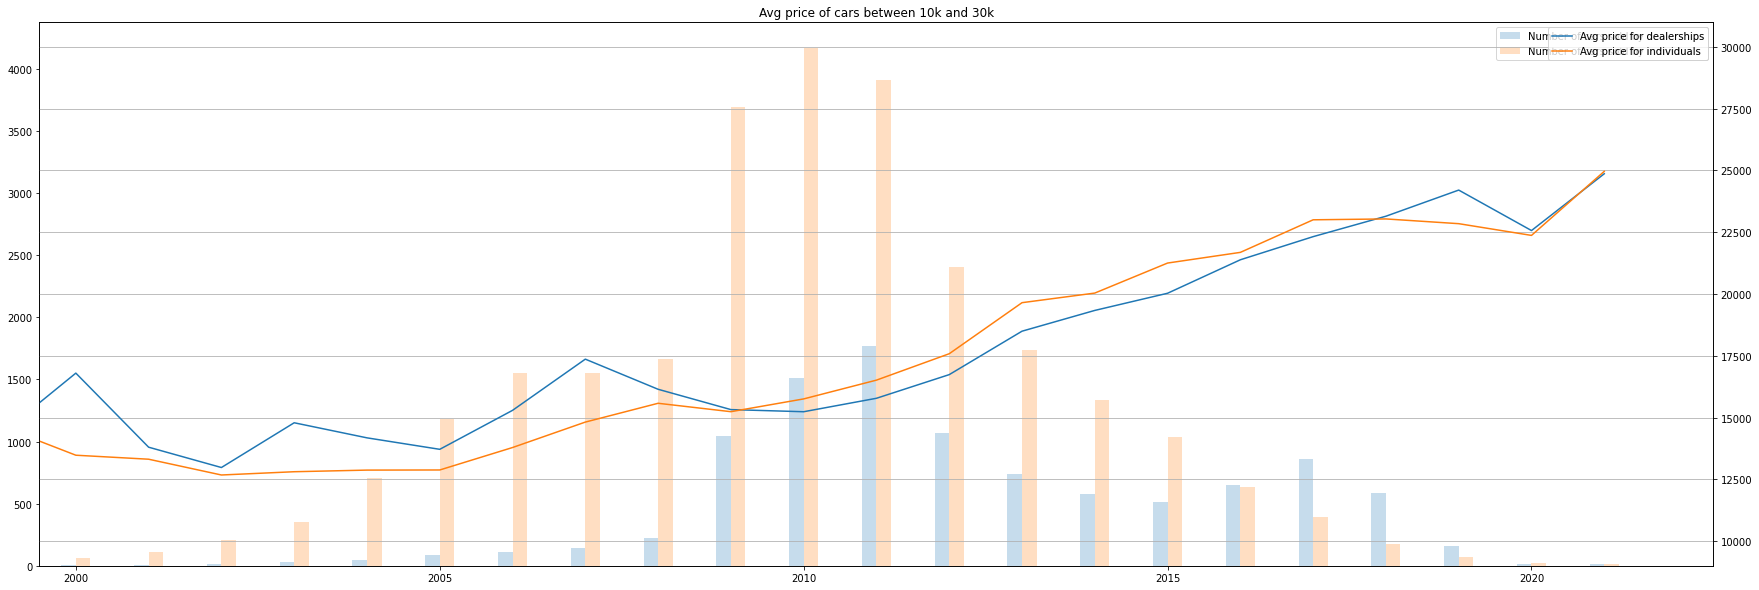

In [40]:
dealerships_sub50 = dealerships_data.query('cijena >= 10000 and cijena <= 30000')
individuals_sub50 = individuals_data.query('cijena >= 10000 and cijena <= 30000')

dealerships_price = dealerships_sub50.groupby('godiste')['cijena'].mean()
individuals_price = individuals_sub50.groupby('godiste')['cijena'].mean()
dealerships_cars = dealerships_sub50.groupby('godiste')['cijena'].count()
individuals_cars = individuals_sub50.groupby('godiste')['cijena'].count()

price_diff = pd.DataFrame({
    'dealerships_price': dealerships_price,
    'individuals_price': individuals_price,
    'dealerships_cars': dealerships_cars,
    'individuals_cars': individuals_cars,
})
price_diff.dropna(inplace=True)

fig, ax = plt.subplots()

width = 0.2
x_dealerships = [x - width/2 for x in list(price_diff.index)]
x_individuals = [x + width/2 for x in list(price_diff.index)]
ax.bar(x_dealerships, price_diff['dealerships_cars'], width=width, label='Number of cars sold by dealerships', alpha=0.25)
ax.bar(x_individuals, price_diff['individuals_cars'], width=width, label='Number of cars sold by individuals', alpha=0.25)
ax.legend()

ax1 = ax.twinx()
ax1.plot(price_diff['dealerships_price'], label='Avg price for dealerships')
ax1.plot(price_diff['individuals_price'], label='Avg price for individuals')
ax1.legend()

ax.set_title('Avg price of cars between 10k and 30k')
plt.xlim(1999.5 ,2022.5)
plt.grid()
plt.show()

<a name="man_data"></a>
# 8 Manufacturers data
[Back to TOC](#toc)

Overview of some basic avg. for different car manufacturers.

In [23]:
man_count = df.proizvodjac.value_counts()
man_age = df.groupby('proizvodjac')['godiste'].mean()
man_price = df.groupby('proizvodjac')['cijena'].mean().astype(int)
man_km = df.groupby('proizvodjac')['kilometraza'].mean().astype(int)
man_km_per_year = (man_km/(2023-man_age)).astype('int')
man_views = df.groupby('proizvodjac')['broj_pregleda'].mean().astype(int)
man_days_listed = df.groupby('proizvodjac')['dana_objavljeno'].mean().round("D")

man_days_int = man_days_listed.astype('int')/86400000000000
man_views_per_day = round(man_views/man_days_int)


man_val = pd.DataFrame({"count": man_count,
                         "year":round(man_age,1),
                         "km": man_km,
                         "km/year": man_km_per_year,
                         "price":man_price,
                         "views": man_views,
                         "days published": man_days_listed,
                         "views/day": man_views_per_day})
man_val.sort_values(by='count', ascending=False).head(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  if __name__ == '__main__':


,count,year,km,km/year,price,views,days published,views/day
Volkswagen,27288,2005.9,245816,14340,12600,793,37 days,21.0
Audi,10478,2007.6,244477,15866,21827,1474,63 days,23.0
Mercedes-Benz,8312,2006.1,254396,15043,22437,1692,89 days,19.0
Peugeot,6687,2008.1,221309,14812,10471,654,44 days,15.0
BMW,6392,2007.7,244370,15981,23338,1802,73 days,25.0
Renault,6064,2007.0,219854,13751,8131,587,45 days,13.0
Škoda,6046,2009.1,222913,16067,12672,829,37 days,22.0
Opel,6032,2005.2,229065,12873,7123,753,55 days,14.0
Ford,3892,2005.8,231056,13411,8181,833,49 days,17.0
Citroen,3438,2009.8,207950,15764,11287,829,56 days,15.0


<a name="drive_a_lot"></a>
## 8.1 Drive a lot? 
[Back to TOC](#toc)

Brands with most km/year.

In [24]:
man_val.sort_values(by='km/year', ascending=False).head(20)

,count,year,km,km/year,price,views,days published,views/day
Tesla,2,2015.5,272500,36333,79450,20316,174 days,117.0
DeTomaso,1,2017.0,125000,20833,21000,5,2 days,2.0
Iveco,51,2005.1,309868,17271,15335,23,7 days,3.0
Bugatti,1,2012.0,183000,16636,14850,5,3 days,2.0
Wiesmann,3,2007.7,252655,16477,16499,5,1 days,5.0
Lexus,18,2010.7,198770,16116,40651,4927,119 days,41.0
Škoda,6046,2009.1,222913,16067,12672,829,37 days,22.0
BMW,6392,2007.7,244370,15981,23338,1802,73 days,25.0
Audi,10478,2007.6,244477,15866,21827,1474,63 days,23.0
Citroen,3438,2009.8,207950,15764,11287,829,56 days,15.0


<a name="cheap_man"></a>
## 8.2 Want a cheap car? 
[Back to TOC](#toc)

Cheapest brands on avg.

In [25]:
man_val.sort_values(by='price').head(20)

,count,year,km,km/year,price,views,days published,views/day
Santana,1,2008.0,220000,14666,950,53,1 days,53.0
Holden,1,2006.0,96000,5647,1000,3958,315 days,13.0
Alpina,1,1999.0,230000,9583,1100,16,1 days,16.0
Wartburg,3,1988.3,370370,10683,1666,27,1 days,27.0
Daewoo,93,2001.3,203524,9365,2264,539,68 days,8.0
TVR,2,1994.5,255000,8947,2300,32,2 days,16.0
Brilliance,1,2006.0,265000,15588,2800,3683,155 days,24.0
Aixam,3,2003.7,186224,9632,2899,7,1 days,7.0
Asia Motors,2,1997.5,243000,9529,2975,7,1 days,7.0
Trabant,4,1993.5,374500,12694,3375,1176,21 days,56.0


<a name="new_man"></a>
## 8.3 Want a newer car? 
[Back to TOC](#toc)

Brands with that have newest avg year manufactured.

In [26]:
man_val.sort_values(by='year', ascending=False).head(20)

,count,year,km,km/year,price,views,days published,views/day
DeTomaso,1,2017.0,125000,20833,21000,5,2 days,2.0
Tesla,2,2015.5,272500,36333,79450,20316,174 days,117.0
Maserati,5,2012.8,96318,9442,72300,10439,198 days,53.0
Aston Martin,1,2012.0,27000,2454,180000,44718,87 days,514.0
Bugatti,1,2012.0,183000,16636,14850,5,3 days,2.0
Dacia,306,2011.9,152459,13725,11856,1060,32 days,33.0
Porsche,313,2011.6,162824,14283,78846,4580,104 days,44.0
Ferrari,4,2011.0,49750,4145,260872,6753,18 days,375.0
DS AUTOMOBILES,21,2010.9,182850,15058,39831,564,19 days,30.0
Corvette,4,2010.8,82250,6714,83000,13214,93 days,142.0


<a name="sold_fast"></a>
## 8.4 What gets sold fast
[Back to TOC](#toc)

Every car is only checked once so it's impossible to tell how many days it will be listed before it gets sold. This just shows avg number of days that the listing has been published for a given brand.

In [27]:
man_val.sort_values(by='days published').head(20)

,count,year,km,km/year,price,views,days published,views/day
Aixam,3,2003.7,186224,9632,2899,7,1 days,7.0
Wiesmann,3,2007.7,252655,16477,16499,5,1 days,5.0
Alpina,1,1999.0,230000,9583,1100,16,1 days,16.0
Asia Motors,2,1997.5,243000,9529,2975,7,1 days,7.0
Wartburg,3,1988.3,370370,10683,1666,27,1 days,27.0
Santana,1,2008.0,220000,14666,950,53,1 days,53.0
MG,1,2007.0,130000,8125,12000,4,1 days,4.0
Königsegg,2,1994.0,190000,6551,9350,15,2 days,8.0
TVR,2,1994.5,255000,8947,2300,32,2 days,16.0
DeTomaso,1,2017.0,125000,20833,21000,5,2 days,2.0


<a name="not_sold"></a>
## 8.5 What isn't getting sold
[Back to TOC](#toc)

Same as the previous except we now show what has been listed the longest.


In [28]:
man_val.sort_values(by='days published', ascending=False).head(20)

,count,year,km,km/year,price,views,days published,views/day
Pontiac,5,1994.8,156948,5565,9559,16237,428 days,38.0
Holden,1,2006.0,96000,5647,1000,3958,315 days,13.0
Lincoln,7,2001.6,170585,7960,17357,3587,261 days,14.0
GMC,10,1997.3,123901,4821,13455,1518,209 days,7.0
Rover,30,1999.7,237138,10177,3459,1775,208 days,9.0
Maserati,5,2012.8,96318,9442,72300,10439,198 days,53.0
Dodge,43,2007.0,184605,11554,20517,4155,189 days,22.0
Tesla,2,2015.5,272500,36333,79450,20316,174 days,117.0
Bentley,3,2001.0,101528,4614,25100,11737,166 days,71.0
Saab,33,2003.0,261539,13076,6389,3441,162 days,21.0


<a name="most_viewed"></a>
## 8.6 Most viewed
[Back to TOC](#toc)


In [29]:
man_val.sort_values(by='views/day', ascending=False).head(20)

,count,year,km,km/year,price,views,days published,views/day
Aston Martin,1,2012.0,27000,2454,180000,44718,87 days,514.0
Cadillac,11,2000.6,141376,6321,29218,4672,11 days,425.0
Ferrari,4,2011.0,49750,4145,260872,6753,18 days,375.0
Corvette,4,2010.8,82250,6714,83000,13214,93 days,142.0
Honda,131,2003.3,222241,11262,10544,11831,92 days,129.0
Hummer,16,2004.6,192957,10501,61593,17063,139 days,123.0
Tesla,2,2015.5,272500,36333,79450,20316,174 days,117.0
Bentley,3,2001.0,101528,4614,25100,11737,166 days,71.0
Trabant,4,1993.5,374500,12694,3375,1176,21 days,56.0
Maserati,5,2012.8,96318,9442,72300,10439,198 days,53.0


<a name="man_age"></a>
# 9 Age for different manufacturers
[Back to TOC](#toc)

Number of cars listed that have been produced in a given year, for top 10 most common brands.

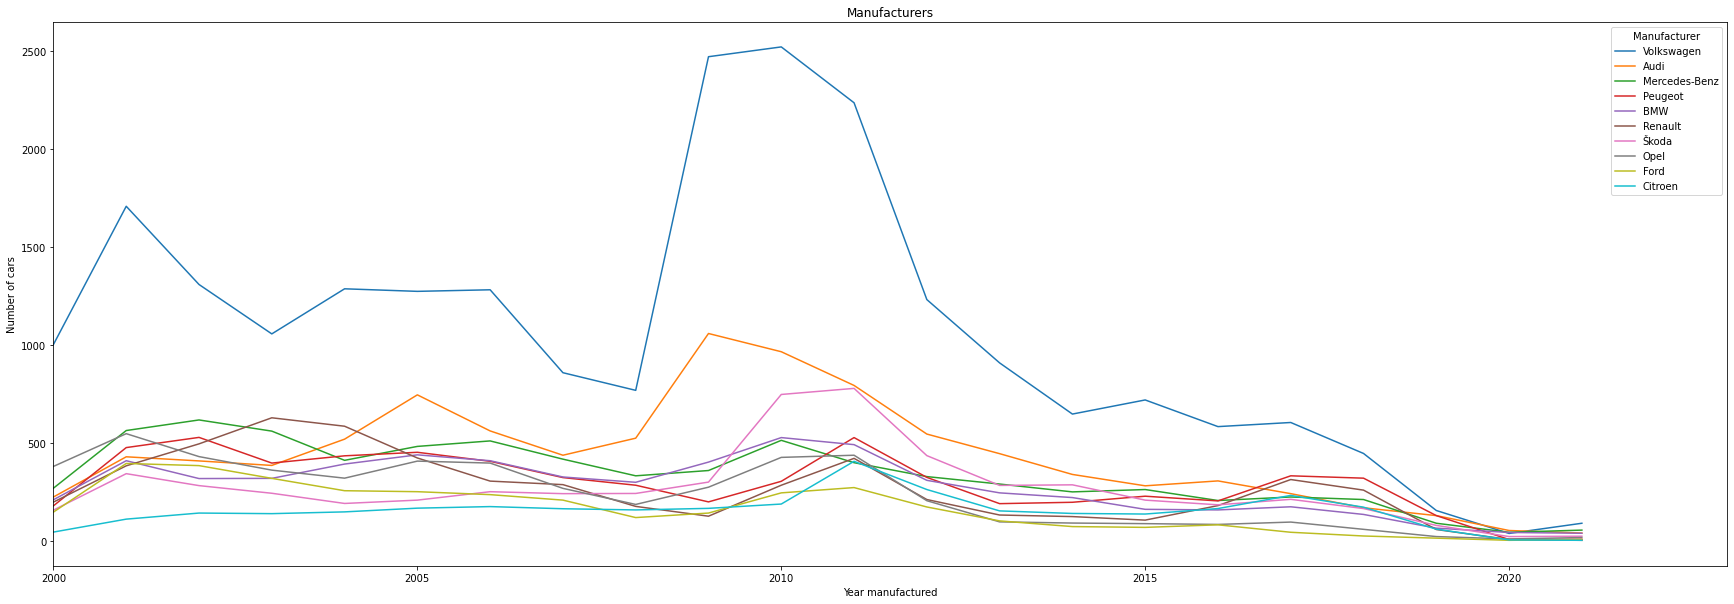

In [53]:
for man in man_prc.index[:10]:
    man_spread_df = df.loc[df['proizvodjac'] == man, ['ime', 'godiste']]
    man_spread_year = man_spread_df.groupby('godiste').count()
    plt.plot(man_spread_year, label=man)
    plt.xlabel('Year manufactured')
    plt.ylabel('Number of cars')
    plt.legend(title='Manufacturer')
    plt.title('Manufacturers')
    plt.xlim([2000, 2023])
plt.show()

<a name="car_depreciation"></a>
# 10 Car price depreciation
[Back to TOC](#toc)

Not sure what would be the best way to find this. I would have to have for example, a price for a 2012 Golf for every year since 2010. Doing it like this is like comparing apples to oranges, since cars manufactured in 2020 are different from cars made in 2010. Also forget about bitcoin looks we should just buy Fabia.

Golf	2010 price: 13729	2020 price: 46699	Price lost: 71%
Passat	2010 price: 12935	2020 price: 63298	Price lost: 80%
A4	2010 price: 17701	2020 price: 81395	Price lost: 78%
Octavia	2010 price: 12862	2020 price: 48499	Price lost: 73%
A6	2010 price: 18972	2020 price: 125840	Price lost: 85%
Astra	2010 price: 10391	2020 price: 19060	Price lost: 45%
Fabia	2010 price: 9031	2020 price: 2500	Price lost: -261%
Polo	2010 price: 10536	2020 price: 20500	Price lost: 49%
A3	2010 price: 14568	2020 price: 41445	Price lost: 65%
Megane	2010 price: 9730	2020 price: 50000	Price lost: 81%


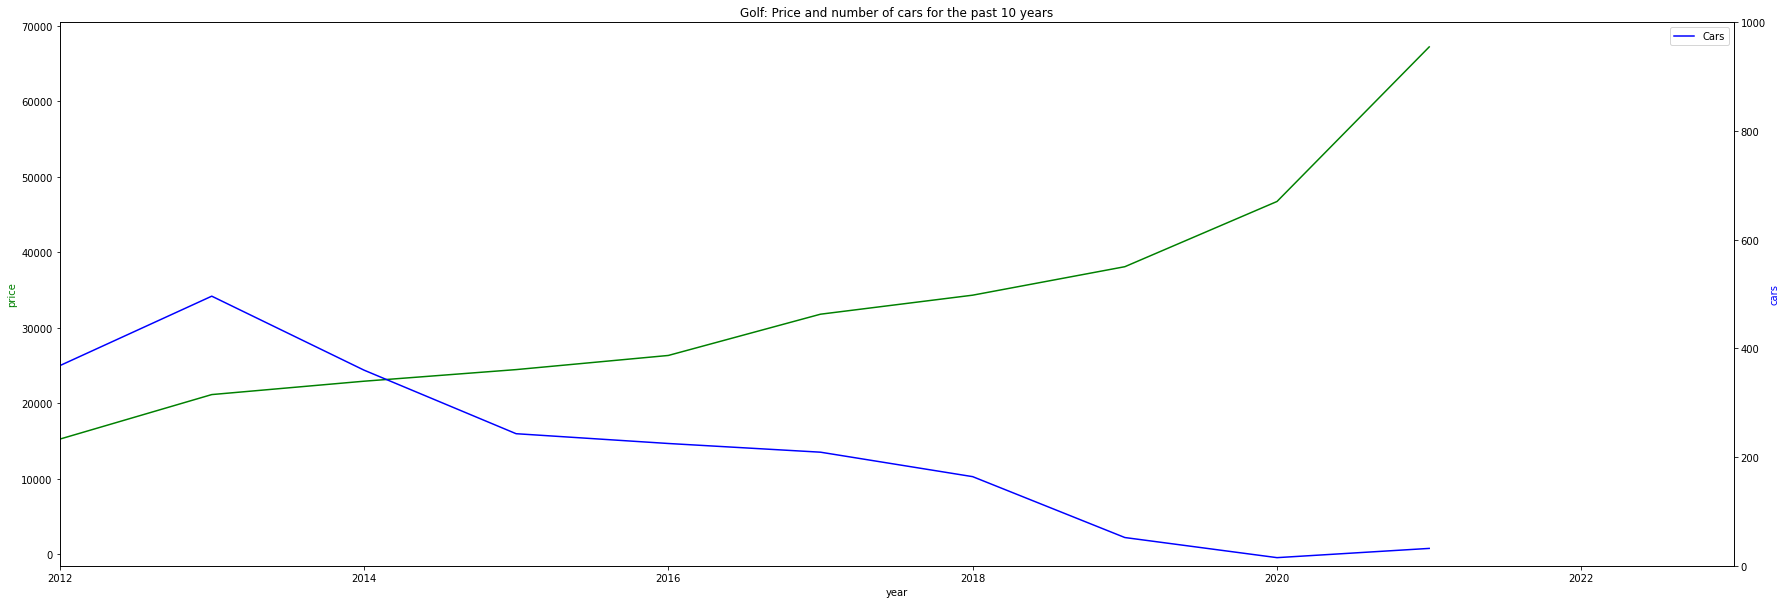

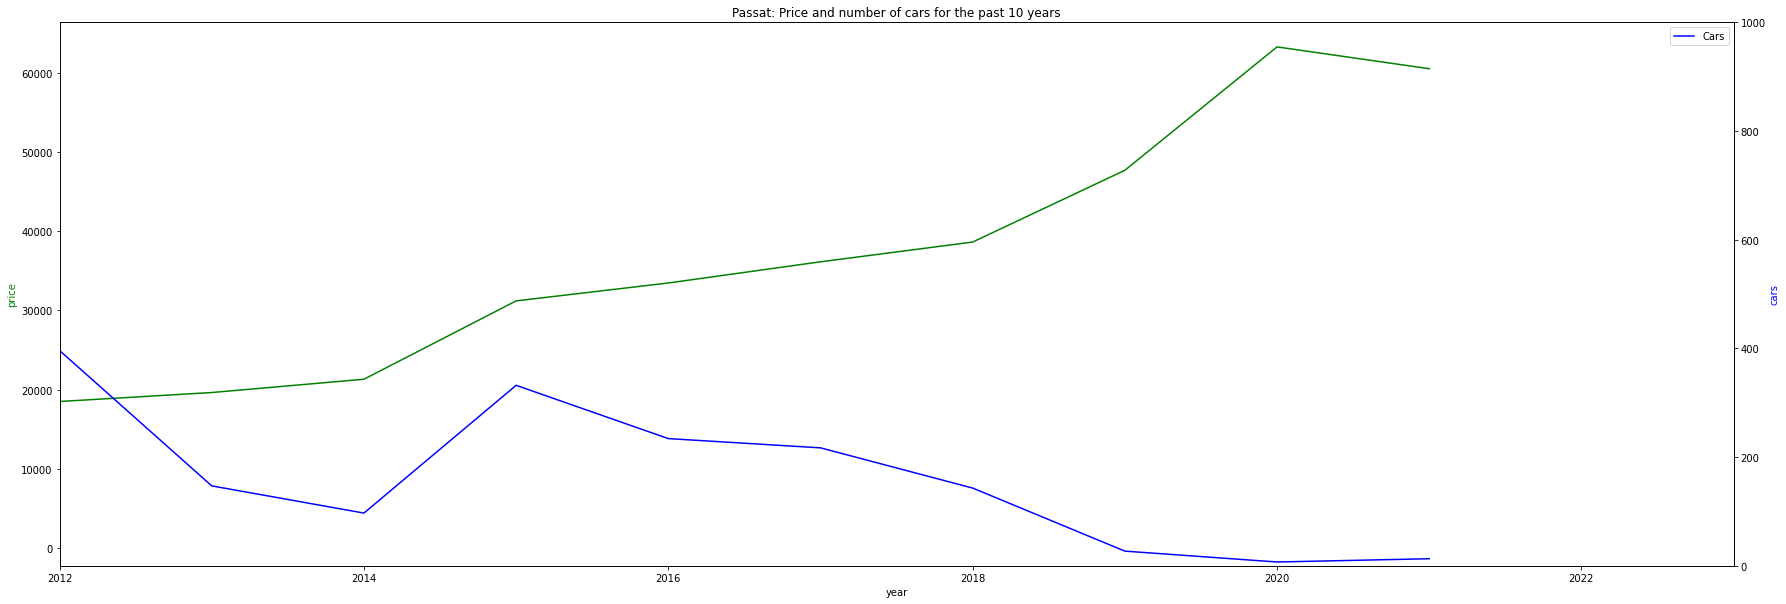

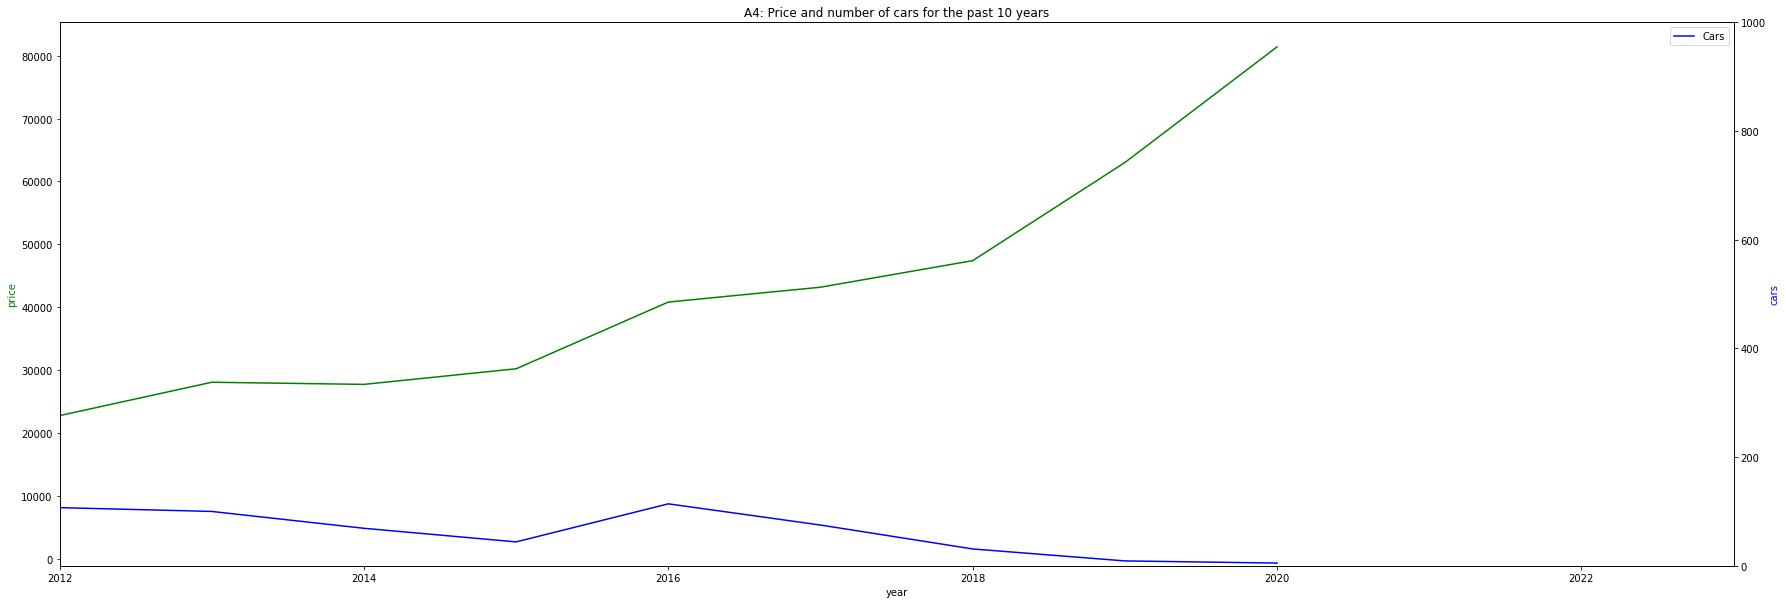

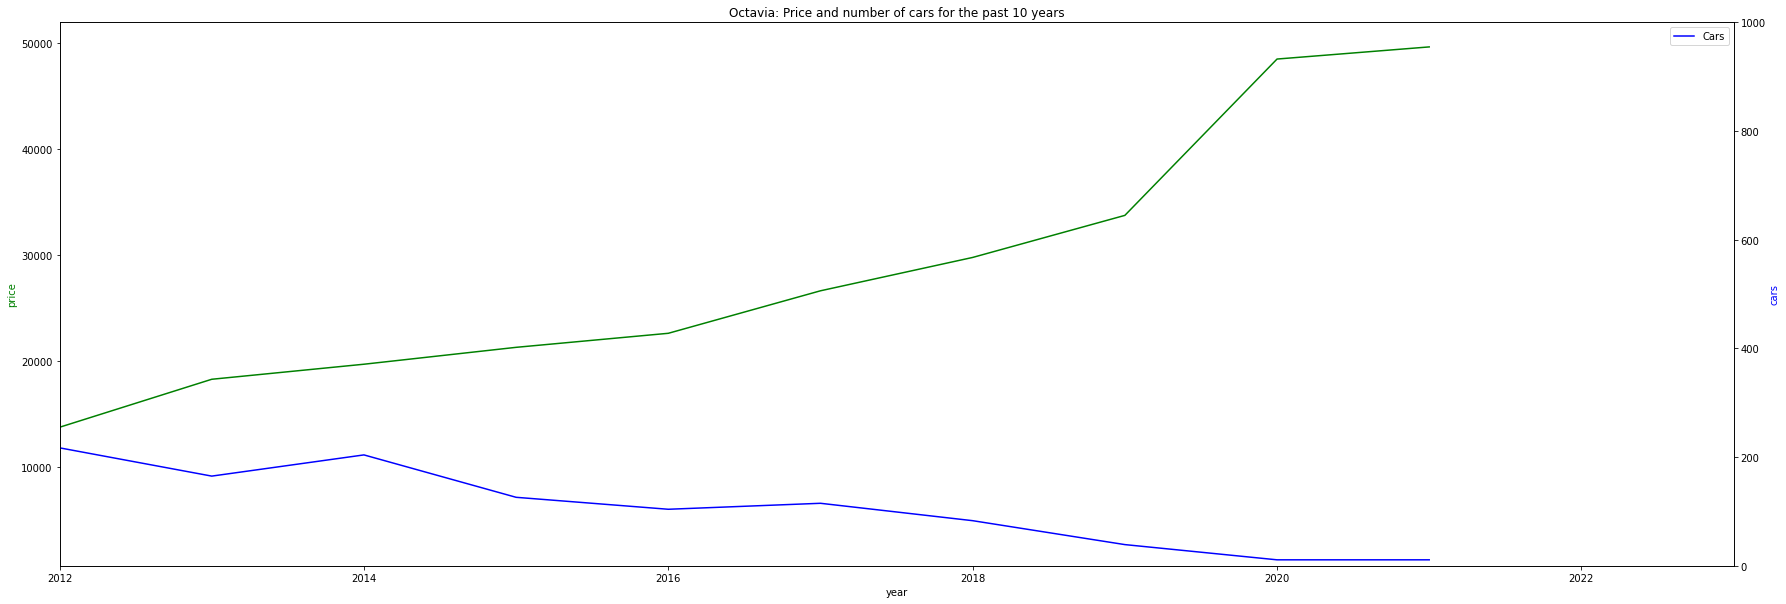

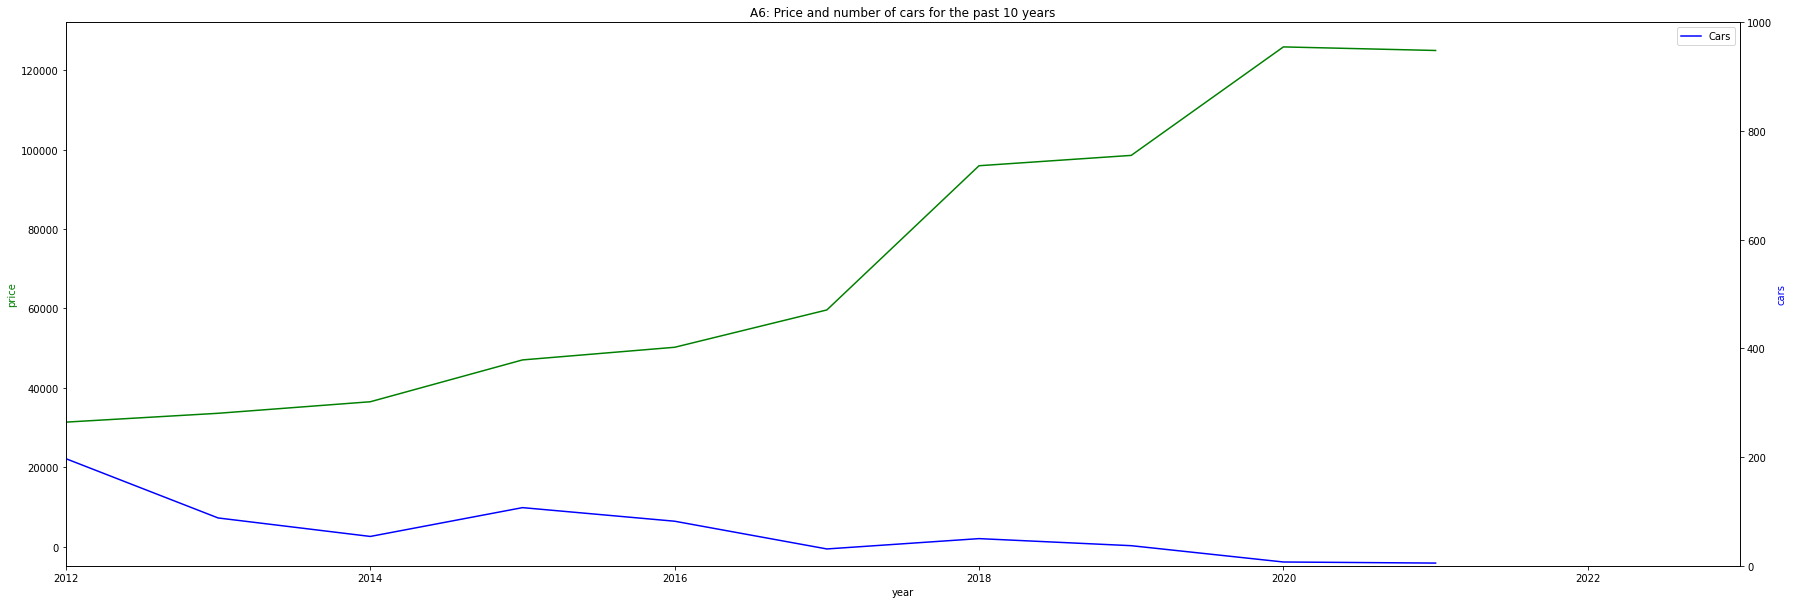

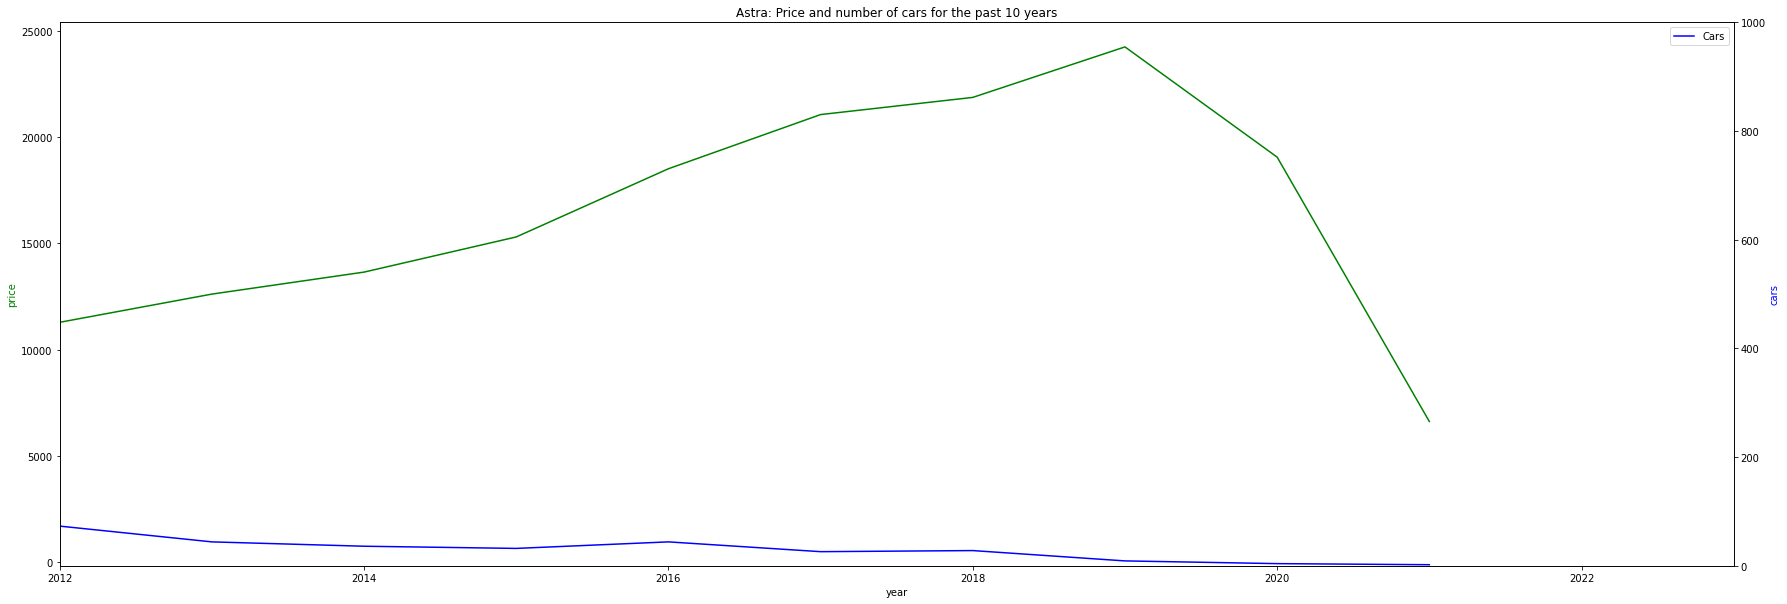

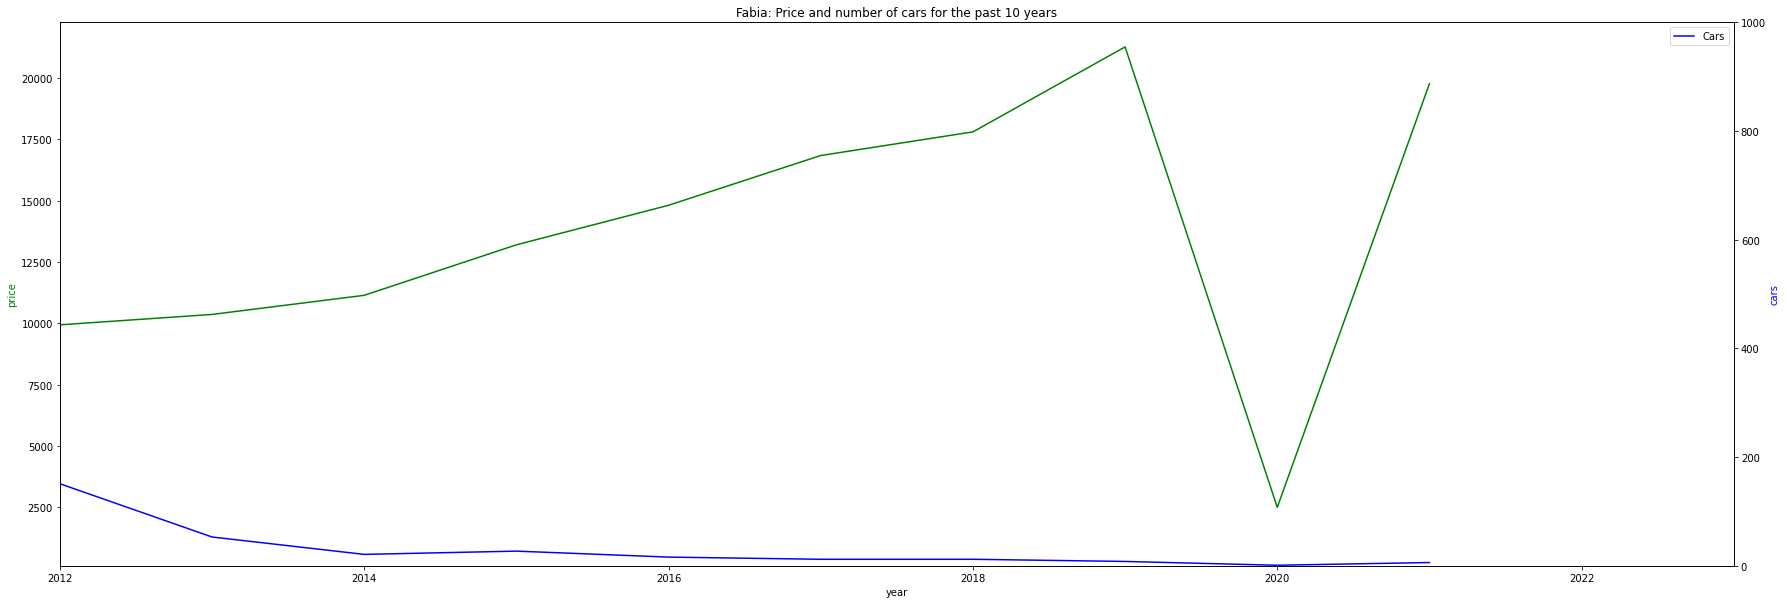

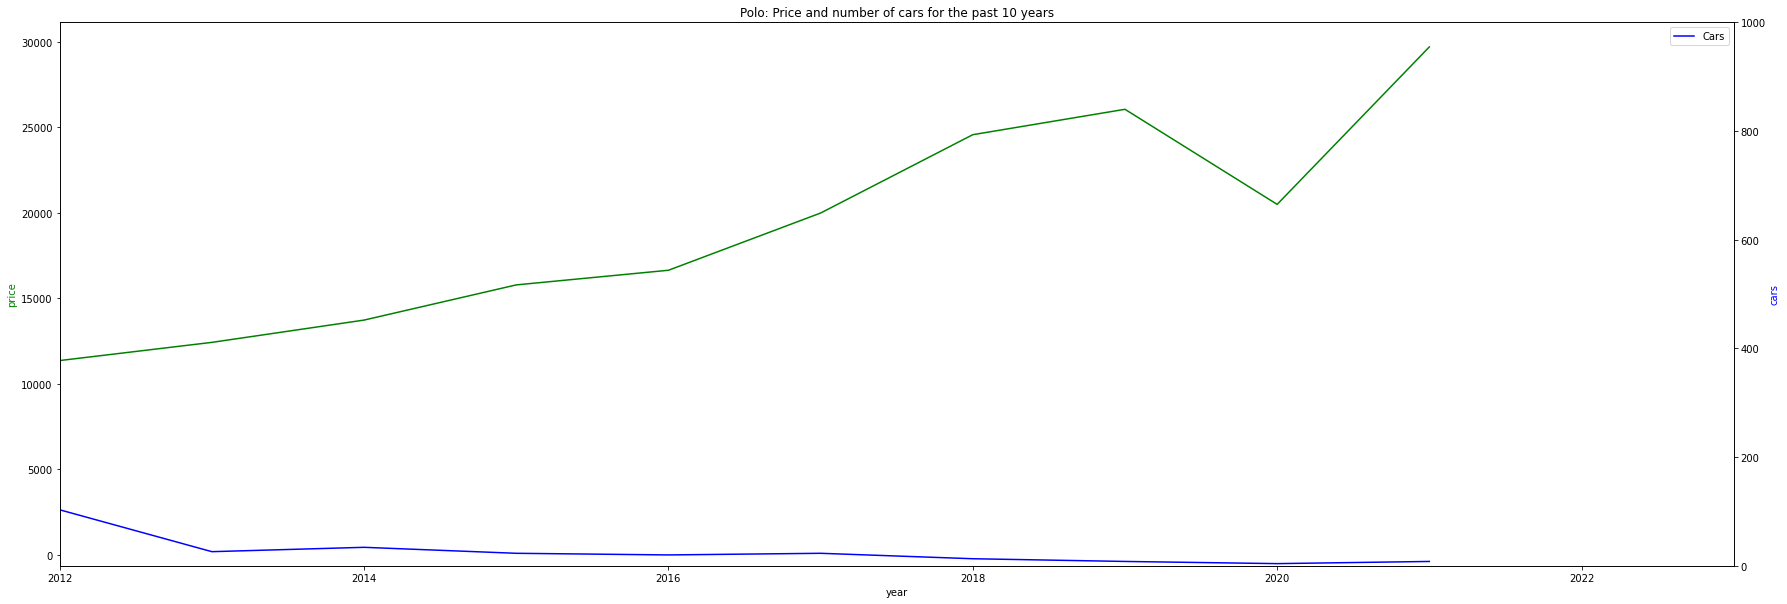

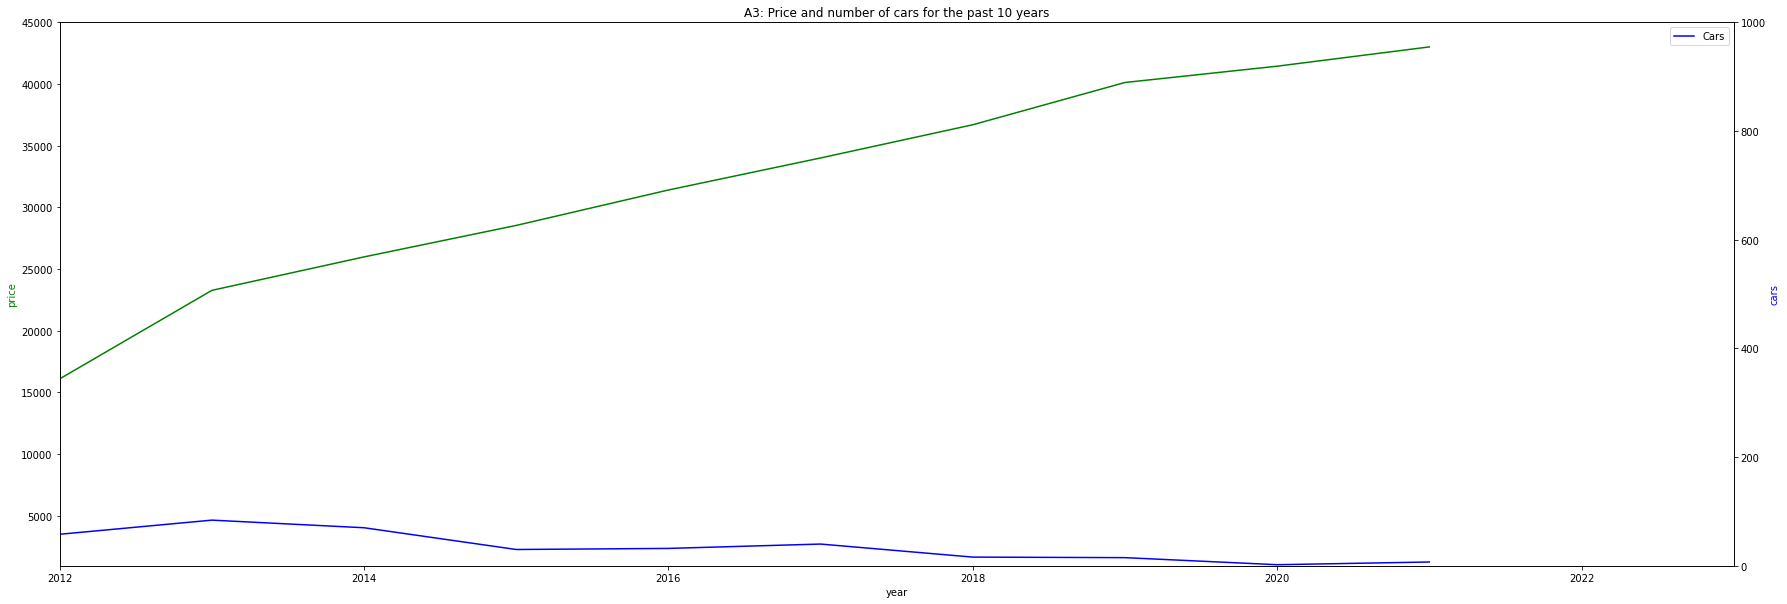

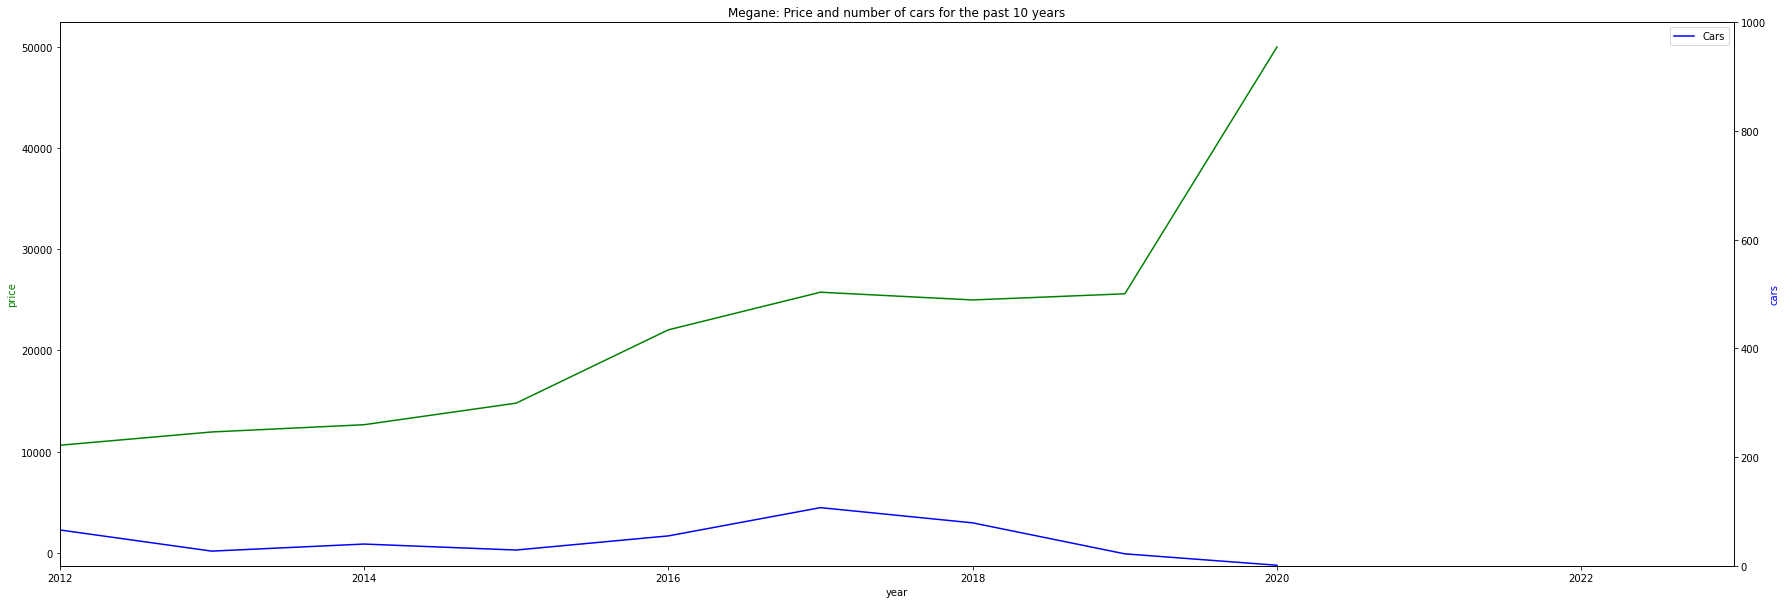

In [63]:
top_models = list(model_count.index[:10])
df2 = df[['model', 'godiste', 'cijena']]
models_price_diff = {}
for model in top_models:
    model_data = df2.loc[df2['model'] == model]
    # print(model, model_data['godiste'].unique())
    year_price = model_data.groupby('godiste')['cijena'].mean()
    year_count = model_data.groupby('godiste')['model'].count()
    
    models_price_diff[model] = (year_price[2010], year_price[2020])
    
    fig, ax1 = plt.subplots()        
    ax1.set_xlabel('year')
    ax1.set_ylabel('price', color='green')
    ax1.plot(year_price, label='Price', color='green')

    ax2 = ax1.twinx()
    ax2.set_ylabel('cars', color='blue')
    ax2.axis(ymin=0, ymax=1000)
    ax2.plot(year_count, label='Cars', color='blue')
    
    plt.xlim([2012,2023])
    plt.title(f'{model}: Price and number of cars for the past 10 years')
    plt.legend()      
        
        
        # plt.plot(year_price, label=model)
        # plt.bar(year_count.index, year_count)
        # plt.legend(title="Model")
        # plt.title(model)
        # plt.xlim([2013,2023])
        # plt.show()
        
for model in models_price_diff:
  price_2010 = int(models_price_diff[model][0])
  price_2020 = int(models_price_diff[model][1])
  print(f"{model}\t2010 price: {price_2010}\t2020 price: {price_2020}\tPrice lost: {(price_2020-price_2010)/price_2020*100:.0f}%")
        

<a name="avg_price_over_time"></a>
# 11 Avg price over time
[Back to TOC](#toc)

Every data point represents the avg price of all cars listed on that day (on avg about 500-600 cars).
Average price seems to be relatively stable in the last ~ 6 months.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[(0.0, 25000.0),
 Text(0, 0.5, 'Price'),
 Text(0.5, 0, 'Days since 14.04.2022.'),
 Text(0.5, 1.0, 'Avg price of cars listed from 15.04.2022. until 28.09.2022.')]

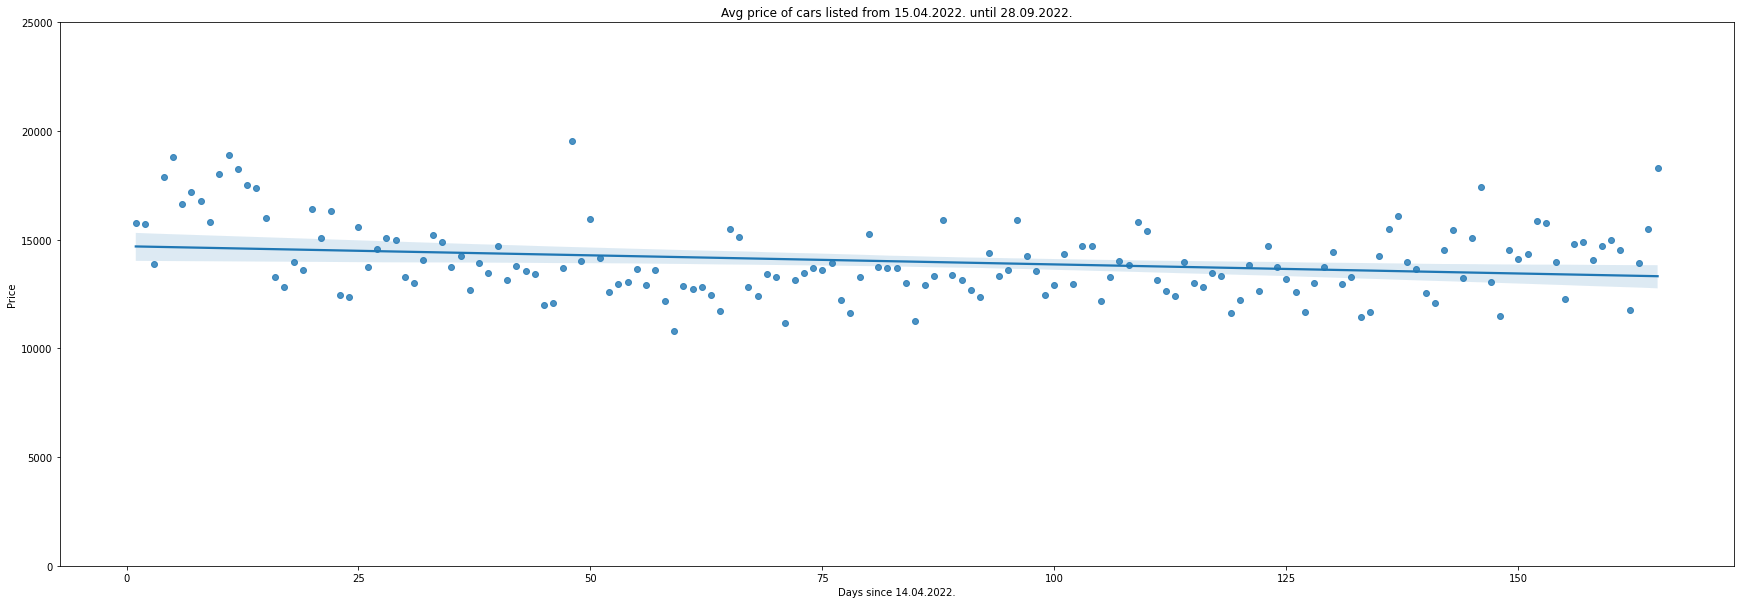

In [64]:
price_over_time = df.groupby('datum')['cijena'].mean()

sns.regplot(list(range(1, len(price_over_time)+1)), price_over_time).set(
    title="Avg price of cars listed from 15.04.2022. until 28.09.2022.",
    ylabel='Price',
    xlabel='Days since 14.04.2022.',
    ylim=(0,25000)
)

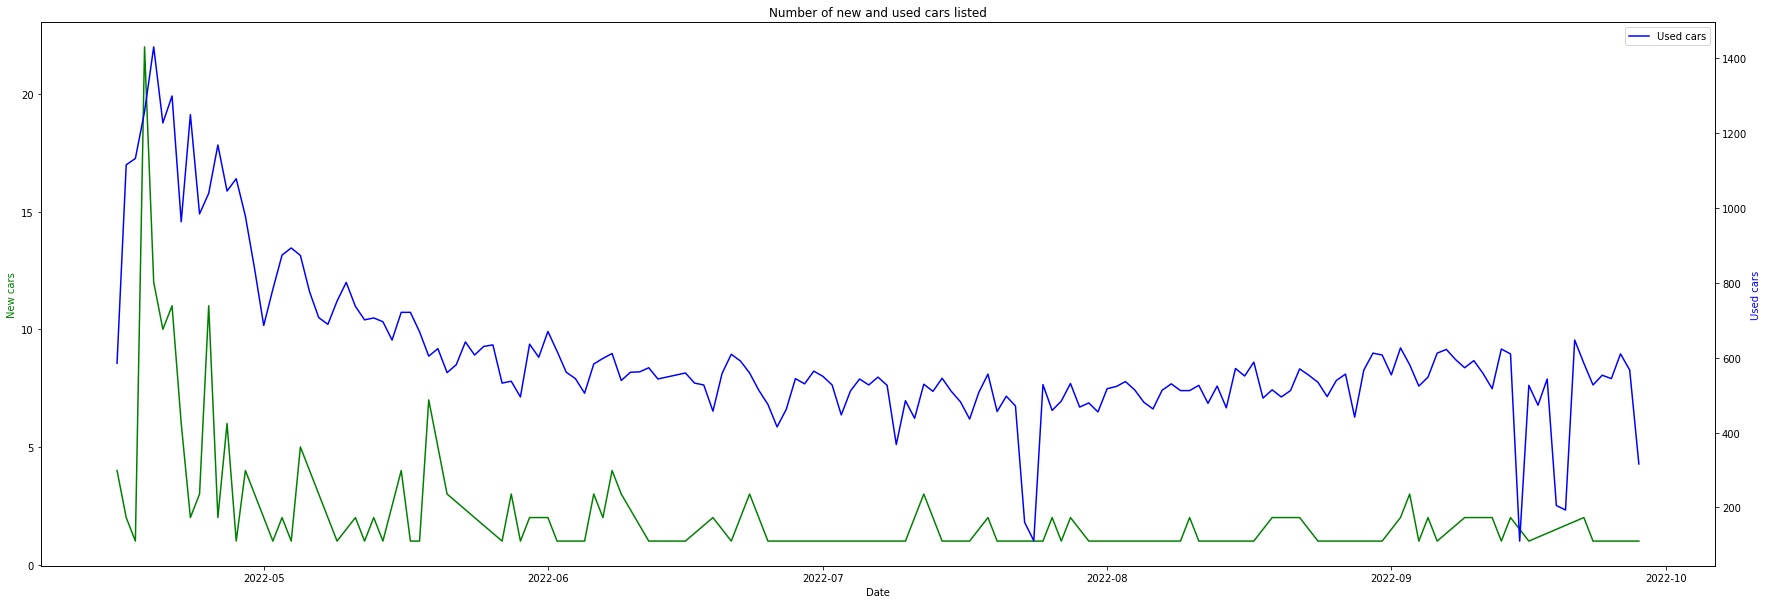

In [33]:
new_cars = df.loc[df['stanje'] == 'Novo', ['id', 'datum']]
used_cars = df.loc[df['stanje'] == 'Korišteno', ['id', 'datum']]
new_cars_number = new_cars.groupby('datum').count()
used_cars_number = used_cars.groupby('datum').count()

fig, ax1 = plt.subplots()        
ax1.set_xlabel('Date')
ax1.set_ylabel('New cars', color='green')
ax1.plot(new_cars_number, label='New cars', color='green')

ax2 = ax1.twinx()
ax2.set_ylabel('Used cars', color='blue')
ax2.plot(used_cars_number, label='Used cars', color='blue')

plt.title('Number of new and used cars listed')
plt.legend()      
        